# 2.2- AdaBoost Algorithm Implementation on the UNSW-NB15 Dataset

Implementation of AdaBoost Classifier algorithm on the University of New South Wales NB15 Dataset.

## Importing libraries and fitting the data

In [1]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
with open('../1.Data_Processing/dataset-nids.pkl', 'rb') as f:
    X_train, y_train, X_test, y_test = pk.load(f)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3549974, 7), (3549974,), (508003, 7), (508003,))

In [4]:
abc = AdaBoostClassifier(n_estimators = 40, learning_rate = 1.5)

y_pred = abc.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 508003 points : 7478


## Plotting the Confusion Matrix

In [5]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

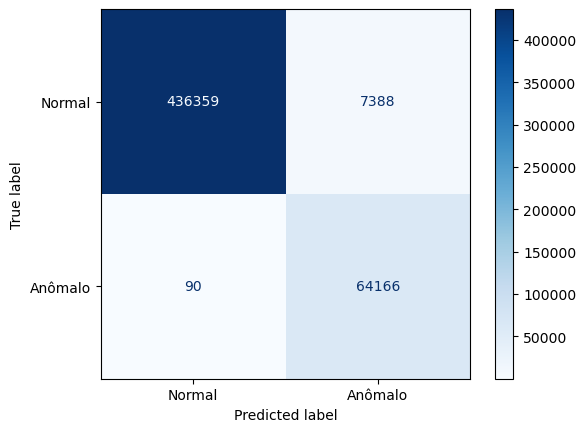

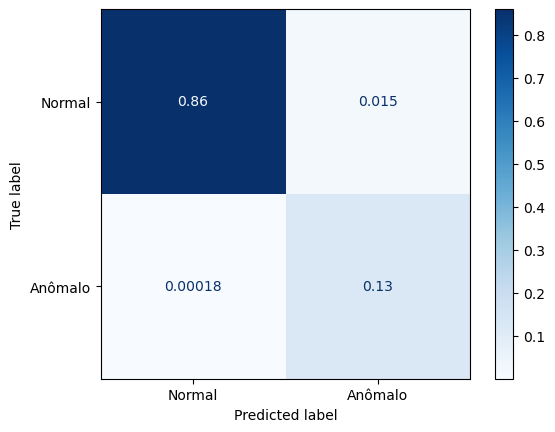

In [6]:
abc_fit = abc.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(abc_fit, X_test, y_test, cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
ConfusionMatrixDisplay.from_estimator(abc_fit, X_test, y_test, normalize = 'all', cmap = 'Blues', display_labels=['Normal', 'Anômalo'])
plt.show()

## Plotting the ROC curve

In [7]:
y_pred_prob = abc_fit.predict_proba(X_test)[::,1]

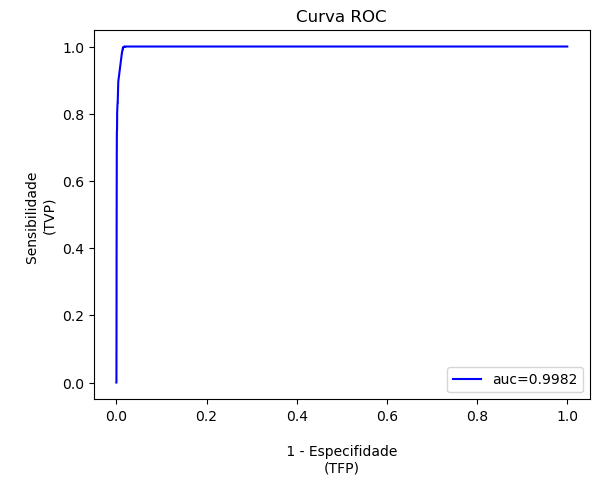

In [8]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,color='blue',label="auc="+str(round(auc,4)))
plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

## Executing the Cross Validation

In [9]:
X_train = np.concatenate((X_train,X_test), axis = 0)
y_train = np.concatenate((y_train,y_test), axis = 0)

In [10]:
X_train.shape, y_train.shape

((4057977, 7), (4057977,))

In [11]:
from sklearn.model_selection import KFold, cross_validate

In [12]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc' ]
gnb = GaussianNB()
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0, base_estimator = gnb)
abc.fit(X_train, y_train)
metrics = cross_validate(abc, X_train, y_train, cv=10, scoring= metrics)

for met in metrics:
    print(f"- {met}:")
    print(f"-- {metrics[met]}\n")
    print(f"-- {np.mean(metrics[met])} +- {np.std(metrics[met])}\n")  

KeyboardInterrupt: 

## Comparative ROC Curve

In [ ]:
abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)
abc_fit = abc.fit(X_train, y_train)
y_pred_prob_0 = abc_fit.predict_proba(X_test)[::,1]

abc = AdaBoostClassifier(n_estimators = 40, learning_rate = 1.0)
abc_fit = abc.fit(X_train, y_train)
y_pred_prob_1 = abc_fit.predict_proba(X_test)[::,1]

abc = AdaBoostClassifier(n_estimators = 30, learning_rate = 1.0)
abc_fit = abc.fit(X_train, y_train)
y_pred_prob_2 = abc_fit.predict_proba(X_test)[::,1]

abc = AdaBoostClassifier(n_estimators = 20, learning_rate = 1.0)
abc_fit = abc.fit(X_train, y_train)
y_pred_prob_3 = abc_fit.predict_proba(X_test)[::,1]

abc = AdaBoostClassifier(n_estimators = 10, learning_rate = 1.0)
abc_fit = abc.fit(X_train, y_train)
y_pred_prob_4 = abc_fit.predict_proba(X_test)[::,1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_0)
auc = roc_auc_score(y_test, y_pred_prob_0)
plt.plot(fpr,tpr,color='black',label="N = 50 / lr = 1.0, AUC="+str(round(auc,4)))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_1)
auc = roc_auc_score(y_test, y_pred_prob_1)
plt.plot(fpr,tpr,color='red',label="N = 40 / lr = 1.0, AUC="+str(round(auc,4)))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_2)
auc = roc_auc_score(y_test, y_pred_prob_2)
plt.plot(fpr,tpr,color='blue',label="N = 30 / lr = 1.0, AUC="+str(round(auc,4)))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_3)
auc = roc_auc_score(y_test, y_pred_prob_3)
plt.plot(fpr,tpr,color='yellow',label="N = 20 / lr = 1.0, AUC="+str(round(auc,4)))

fpr, tpr, _ = roc_curve(y_test,  y_pred_prob_4)
auc = roc_auc_score(y_test, y_pred_prob_4)
plt.plot(fpr,tpr,color='green',label="N = 10 / lr = 1.0, AUC="+str(round(auc,4)))

plt.ylabel('\nSensibilidade \n(TVP)')
plt.xlabel('\n 1 - Especifidade \n(TFP)')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()